# Exploración de los datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

La primera columna tienes las fechas

In [ ]:
df2015 = pd.read_csv('./drive/MyDrive/DatosInvestigacion/NoNull2015.csv', index_col=0, parse_dates=True)

In [ ]:
df2015.head()

,Date,Time,Local Time,DC,PAAVG1H,PAMAX1H,PAMIN1H,PRSUM1H,RHAVG1H,RHMAX1H,RHMIN1H,SRDIFAVG1H,SRDIFMAX1H,SRDIFMIN1H,SRDIFSUM1H,SRGLOAVG1H,SRGLOMAX1H,SRGLOMIN1H,SRGLOSUM1H,TAAVG1H,TAMAX1H,TAMIN1H,TS1AVG1H,TS1MAX1H,TS1MIN1H,TS2AVG1H,TS2MAX1H,TS2MIN1H,TS3AVG1H,TS3MAX1H,TS3MIN1H,TS4AVG1H,TS4MAX1H,TS4MIN1H,TS5AVG1H,TS5MAX1H,TS5MIN1H,TS6AVG1H,TS6MAX1H,TS6MIN1H,TS7AVG1H,TS7MAX1H,TS7MIN1H,WD1HA,WD1HX,WDGM,WGD1HX,WGDH,WR1H,WS1HA,WS1HM,WS1HX
DateTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01 06:00:00,2015-01-01,06:00:00,01:00:00,13.1,743.2,743.6,742.8,0.0,98,99,94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.8,9.7,8.1,7.9,8.3,7.2,8.4,8.7,7.6,9.6,9.9,9,11.9,12,11.8,14.3,14.4,14.2,15,15,15,15,15,15,65,21,53,71.0,0.0,15.0,1.0,0.0,2.9
2015-01-01 07:00:00,2015-01-01,07:00:00,02:00:00,13.1,742.6,742.8,742.4,0.0,96,97,94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.6,9.8,9.1,9.1,9.5,8.3,9.4,9.9,8.7,10.4,10.7,9.9,12.1,12.2,12,14.1,14.2,14.1,15,15,15,15,15,15,43,93,17,49.0,1.0,26.0,1.8,0.0,3.0
2015-01-01 08:00:00,2015-01-01,08:00:00,03:00:00,13.1,742.1,742.4,741.9,0.0,94,95,93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.9,10.1,9.7,9.5,9.6,9.5,9.9,9.9,9.9,10.8,10.8,10.7,12.2,12.3,12.2,14,14.1,14,15,15,15,15,15,15,47,84,12,55.0,2.0,28.0,1.9,0.5,2.9
2015-01-01 09:00:00,2015-01-01,09:00:00,04:00:00,13.0,741.8,741.9,741.7,0.0,95,96,93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.3,9.7,9.4,9.5,8.9,9.8,9.9,9.3,10.7,10.8,10.3,12.3,12.3,12.2,14,14,14,15,15,15,15,15,15,44,97,31,53.0,3.0,23.0,1.5,0.4,2.7
2015-01-01 10:00:00,2015-01-01,10:00:00,05:00:00,13.0,741.8,741.9,741.7,0.0,96,98,94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.4,10.0,9.0,8.1,8.9,7.8,8.5,9.3,8.2,9.7,10.3,9.5,12,12.2,11.9,13.9,14,13.9,15,15,15,15,15,15,50,92,51,33.0,4.0,21.0,1.4,0.4,2.6


Se consigue la variable que se quiere predecir.

In [ ]:
df = df2015['SRGLOAVG1H']
df

DateTime
2015-01-01 06:00:00    0.0
2015-01-01 07:00:00    0.0
2015-01-01 08:00:00    0.0
2015-01-01 09:00:00    0.0
2015-01-01 10:00:00    0.0
                      ... 
2016-01-01 01:00:00    0.0
2016-01-01 02:00:00    0.0
2016-01-01 03:00:00    0.0
2016-01-01 04:00:00    0.0
2016-01-01 05:00:00    0.0
Name: SRGLOAVG1H, Length: 8760, dtype: float64

## Separación de datos

In [ ]:
train_size = int(len(df)*0.8)

In [ ]:
train_size

7008

Datos de entrenamiento

In [ ]:
df_train = df.iloc[:train_size]

In [ ]:
df_train.tail()

DateTime
2015-10-20 01:00:00    0.0
2015-10-20 02:00:00    0.0
2015-10-20 03:00:00    0.0
2015-10-20 04:00:00    0.0
2015-10-20 05:00:00    0.0
Name: SRGLOAVG1H, dtype: float64

Datos de prueba

In [ ]:
df_test = df.iloc[train_size:]

In [ ]:
df_test.head()

DateTime
2015-10-20 06:00:00    0.0
2015-10-20 07:00:00    0.0
2015-10-20 08:00:00    0.0
2015-10-20 09:00:00    0.0
2015-10-20 10:00:00    0.0
Name: SRGLOAVG1H, dtype: float64

## Estacionariedad

In [ ]:
import statsmodels.tsa.stattools as sts 

La serie es estacionaria.
* Valor estadístico de contraste: -9
* P-value: 7.34e-16

In [ ]:
sts.adfuller(df_train)

(-9.371789123023117,
 7.343999589169458e-16,
 29,
 6978,
 {'1%': -3.4312874759517986,
  '10%': -2.5669905220049976,
  '5%': -2.8619542888487275},
 83644.33153517488)

## Estacionalidad

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

Se puede observar la estacionalidad de la serie.

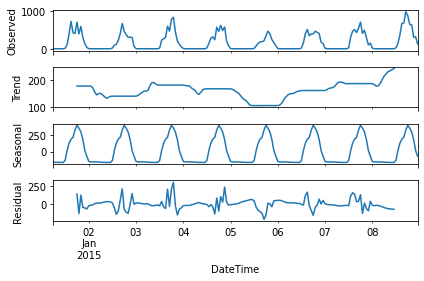

In [ ]:
s_dec_additive = seasonal_decompose(df_train['2015-01-01':'2015-01-08'], model = "additive")
s_dec_additive.plot()
plt.show()

## Autocorrelación

In [ ]:
import statsmodels.graphics.tsaplots as sgt

Se observa autocorrelación con los datos de un día antes (24h) y hasta dos días antes (48h).

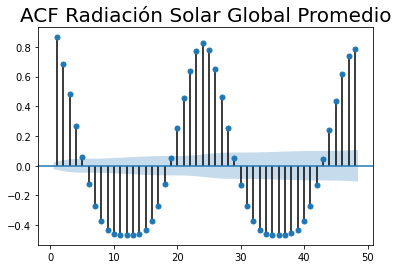

In [ ]:
sgt.plot_acf(df_train, lags = 48, zero = False)
plt.title("ACF Radiación Solar Global Promedio", size = 20)
plt.show()

## Autocorrelación parcial
Método de mínimos cuadrados ordinarios. No considera los efectos indirectos.

La influencia de datos pasados se mantiene hasta cerca de 24 horas.

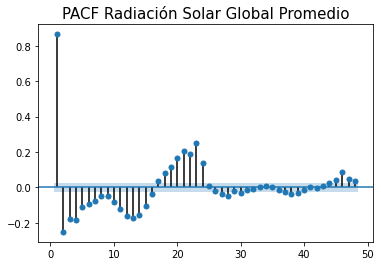

In [ ]:
sgt.plot_pacf(df_train, lags = 48, zero = False, method = ('ols'))
plt.title("PACF Radiación Solar Global Promedio", size = 15)
plt.show()

## Gráfico de los datos

Separa fecha y hora

In [ ]:
df_graph = df2015[['Date','Time','SRGLOAVG1H']]

In [ ]:
df_graph['Date'] = pd.to_datetime(df_graph['Date'], dayfirst = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_graph.head()

,Date,Time,SRGLOAVG1H
DateTime,,,
2015-01-01 06:00:00,2015-01-01,06:00:00,0.0
2015-01-01 07:00:00,2015-01-01,07:00:00,0.0
2015-01-01 08:00:00,2015-01-01,08:00:00,0.0
2015-01-01 09:00:00,2015-01-01,09:00:00,0.0
2015-01-01 10:00:00,2015-01-01,10:00:00,0.0


In [ ]:
df_pivot = df_graph.pivot(index='Date', columns='Time', values='SRGLOAVG1H')
df_pivot

Time,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
Date,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,15.0,107.0,394.0,728.0,428.0,403.0,709.0,397.0,594.0,308.0,136.0,35.0
2015-01-02,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,97.0,118.0,227.0,408.0,674.0,459.0,377.0,302.0,310.0,298.0,63.0
2015-01-03,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,228.0,264.0,304.0,600.0,470.0,783.0,837.0,449.0,207.0,122.0,54.0
2015-01-04,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,143.0,282.0,314.0,241.0,574.0,460.0,622.0,485.0,581.0,205.0,79.0
2015-01-05,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,74.0,141.0,183.0,186.0,213.0,344.0,469.0,399.0,245.0,162.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-28,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,133.0,442.0,375.0,346.0,310.0,288.0,447.0,342.0,258.0,207.0,80.0
2015-12-29,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0,139.0,349.0,288.0,547.0,500.0,332.0,502.0,612.0,409.0,142.0,124.0
2015-12-30,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,191.0,301.0,549.0,590.0,690.0,417.0,520.0,579.0,277.0,325.0,156.0


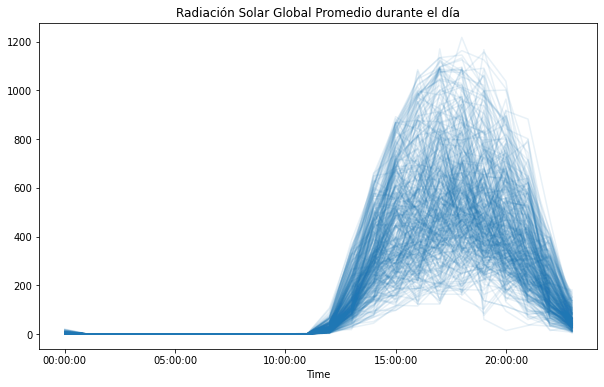

In [ ]:
# Plot con transparencia
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

df_pivot.T.plot(ax=ax, color='C0', alpha=0.1, legend=False) #alpha: Nivel de transparencia
ax.set_title('Radiación Solar Global Promedio durante el día');

Ajuste de horario

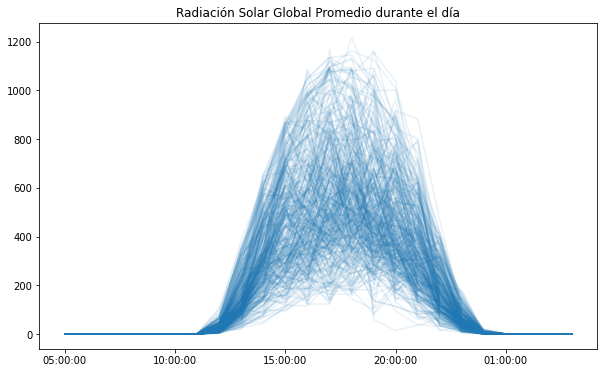

In [ ]:
# Existen 5 horas de diferencia entre el tiempo local y la variable Time
df_roll = pd.DataFrame(index=df_pivot.index, 
                       columns=np.roll(df_pivot.columns, -5), 
                       data=np.roll(df_pivot.values, -5))

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
df_roll.T.plot(ax=ax, color='C0', alpha=0.1, legend=False)
ax.set_title('Radiación Solar Global Promedio durante el día');

Media minimo maximo 